# Plotting all the members of a model

`cd project/seniorthesis/notebooks`

`conda list PyCO2SYS`

`pip install PyCO2SYS`

`pip install git+https://github.com/jbusecke/cmip6_preprocessing.git`

`mv *.png ../figures`

In [1]:
from scipy.io import loadmat
import xarray as xr
import xesmf as xe
from cmip6_preprocessing.preprocessing import combined_preprocessing
import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from cmip6_preprocessing.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.path as mpath
from cmip6_preprocessing.postprocessing import combine_datasets
from cmip6_preprocessing.postprocessing import merge_variables
from dask.diagnostics import ProgressBar
from xgcm import Grid
from xhistogram.xarray import histogram
import pandas as pd
from scipy.io import netcdf
import netCDF4 as nc


In [2]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

## Area

In [3]:
def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

variables = ['areacello']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Ofx'], 
             variable_id=variables,
             grid_label=['gr'],
              source_id=['GFDL-ESM4']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_A = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [4]:
# pick first member in case there are multiple members
dd_A = combine_datasets(
    dd_A,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)
list(dd_A.keys())
# dd_new_new_gr

['GFDL-ESM4.gr.historical.Ofx']

## Get `fgco2` for one model but all members

In [9]:
def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

variables = ['fgco2']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             grid_label=['gr'],
              source_id=['CESM2']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_CESM2 = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

list(dd_CESM2.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


['CMIP.NCAR.CESM2.historical.r1i1p1f1.Omon.fgco2.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Omon/fgco2/gr/v20190308/.nan.20190308',
 'CMIP.NCAR.CESM2.historical.r7i1p1f1.Omon.fgco2.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r7i1p1f1/Omon/fgco2/gr/v20190311/.nan.20190311',
 'CMIP.NCAR.CESM2.historical.r8i1p1f1.Omon.fgco2.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8i1p1f1/Omon/fgco2/gr/v20190311/.nan.20190311',
 'CMIP.NCAR.CESM2.historical.r4i1p1f1.Omon.fgco2.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4i1p1f1/Omon/fgco2/gr/v20190308/.nan.20190308',
 'CMIP.NCAR.CESM2.historical.r9i1p1f1.Omon.fgco2.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r9i1p1f1/Omon/fgco2/gr/v20190311/.nan.20190311',
 'CMIP.NCAR.CESM2.historical.r10i1p1f1.Omon.fgco2.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r10i1p1f1/Omon/fgco2/gr/v20190313/.nan.20190313',
 'CMIP.NCAR.CESM2.historical.r6i1p1f1.Omon.fgco2.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6i1p1f1/Omon/fgco2/gr/v20190308

## Assign new coords

In [11]:
newcoords = {'x':dd_A['GFDL-ESM4.gr.historical.Ofx'].areacello['x'], 'y':dd_A['GFDL-ESM4.gr.historical.Ofx'].areacello['y']}
newcoords

{'x': <xarray.DataArray 'x' (x: 360)>
 array([  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5])
 Coordinates:
   * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
 Attributes:
     axis:           X
     bounds:         lon_bnds
     cell_methods:   time: point
     long_name:      longitude
     standard_name:  longitude
     units:          degrees_E,
 'y': <xarray.DataArray 'y' (y: 180)>
 array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
        -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
        -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
        -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
        -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
        -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
        -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
        -19.5, -18.5, -17.5, -16.5,

In [20]:
A = dd_A['GFDL-ESM4.gr.historical.Ofx'].areacello

In [16]:
for name, ds in dd_CESM2.items():
    dd_CESM2[name] = ds.assign_coords(**newcoords)

In [23]:
for name, ds in dd_CESM2.items():
    ds = ds.isel(time = slice(0,239))
    dd_CESM2[name] = ds.mean('time',keep_attrs=True)

In [24]:
dd_CESM2['CMIP.NCAR.CESM2.historical.r10i1p1f1.Omon.fgco2.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r10i1p1f1/Omon/fgco2/gr/v20190313/.nan.20190313']

<xarray.Dataset>
Dimensions:        (y: 180, x: 360, bnds: 2, vertex: 4)
Coordinates:
  * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
    lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
    lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
Dimensions without coordinates: bnds, vertex
Data variables:
    fgco2          (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
Attributes: (12/50)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   306600.0
    case_id:                 24
    ...                      ...
    variant_label:           r10i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/0f426d39-2dda-4a2a-92c1-0c78abafd07...
    version_id:              v20190313
    intake_esm_varname:      None
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.r10i1p1f1.Omon.fgco2....

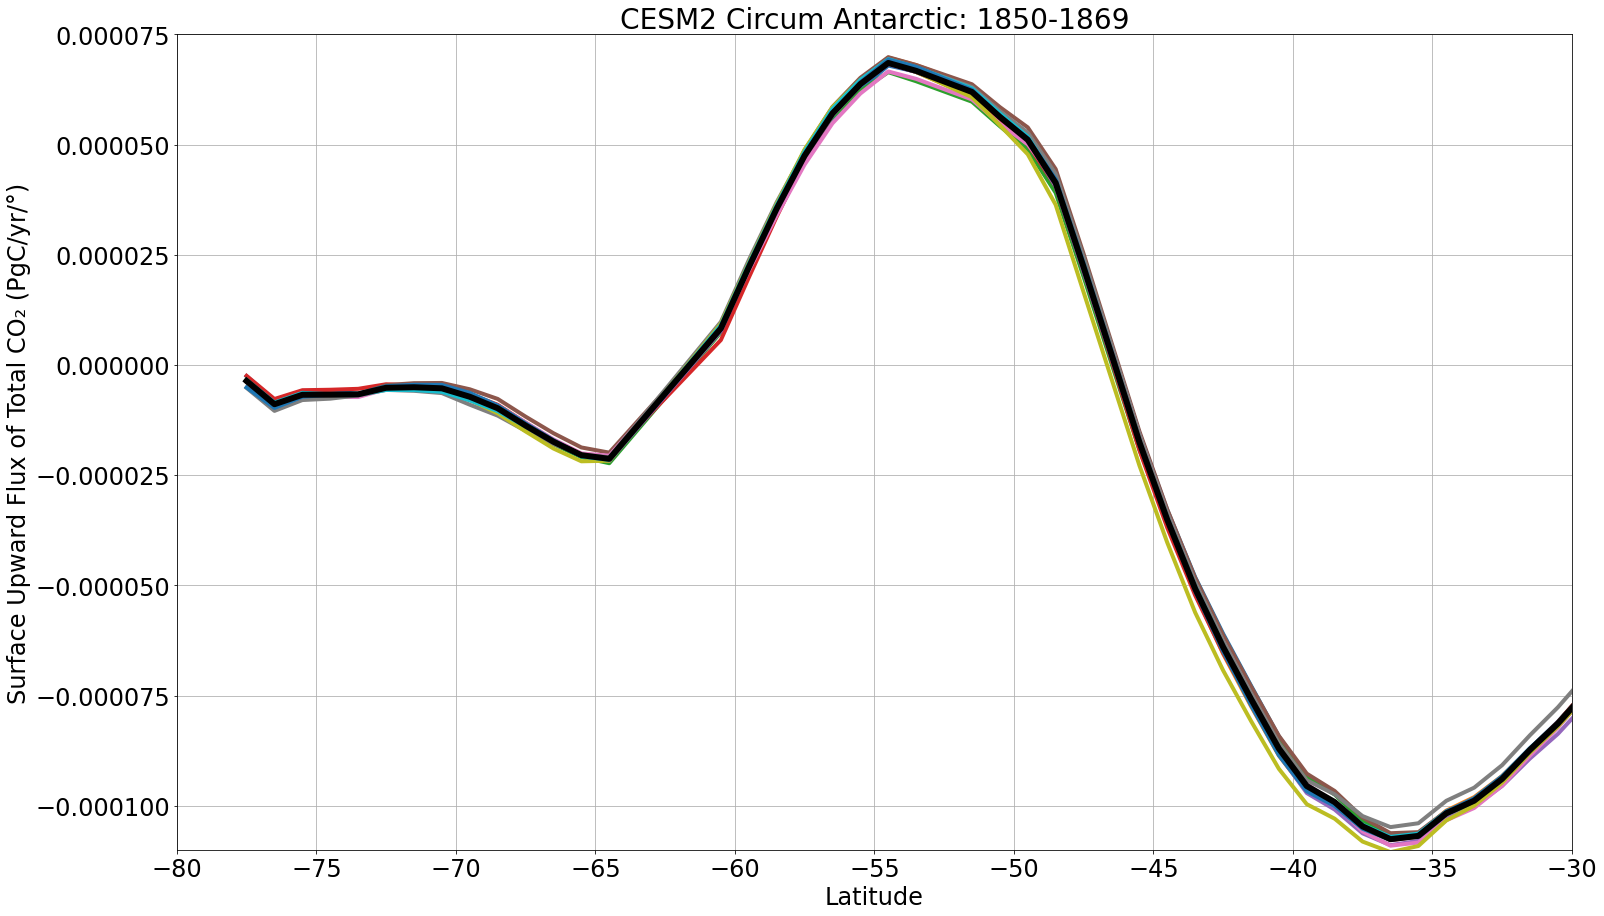

In [43]:
plt.rc('font', size = 24)
plt.rc('axes', titlesize= 24)    
plt.rc('axes', labelsize= 24)
plt.rc('figure', titlesize=24)

temp = {}

conversion = 3.1536e7 * 83.3
for name, ds in dd_CESM2.items():
    # multiply by conversion and A
    # multiply by -1 so it is surf UPWARD flux
    d = -1*ds.fgco2*A*conversion*12/1e15
    d = d.mean(['x'],keep_attrs=True)
    ar = d
    # d = -1*ds.fgco2.mean(['x'],keep_attrs=True)*conversion
    # # d = d.mean(['x'],keep_attrs=True)*conversion
    # ar = d*A2
    
    # put into a temp array so I can eventually take a mean of temp members
    temp[name]=ar
    
# plots the individual models .sel(y = slice(-80, -30))
for name, ds in temp.items():
    plt.plot(ds.y, ds, label = name, lw = 4)
    plt.xlabel('Latitude')
    plt.ylabel('Surface Upward Flux of Total CO\u2082 (molC/m\u00b2/yr)')

# take the mean of temp and plot
mn = np.mean(list(temp.values()), axis=0)
plt.plot(ds.y, mn, lw = 6, label = 'Ensemble mean', color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Surface Upward Flux of Total CO\u2082 (molC/m\u00b2/yr)')

# zr = xr.zeros_like(dd['CESM2-FV2.gr.historical.Omon'].fgco2)
# plt.plot(zr.y, zr, linestyle = 'dashed', color = 'black')
plt.xlabel('Latitude', fontsize = 24)
plt.ylabel('Surface Upward Flux of Total CO\u2082 (PgC/yr/\u00b0)', fontsize = 24)
plt.ylim([-0.00011,0.000075])
plt.xlim([-80,-30])
plt.xticks([-80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30])
plt.grid()
# plt.ylim([-5e19, 5e19])
# plt.legend(
# #     bbox_to_anchor=(1.05, 1), 
#     loc='upper right', fontsize = 18
# #     , borderaxespad=0.
# )
plt.title('CESM2 Circum Antarctic: 1850-1869', fontsize = 28)
plt.rcParams["figure.figsize"] = (25,15)

In [31]:
def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

variables = ['fgco2']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             grid_label=['gn'],
              source_id=['IPSL-CM6A-LR']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_IPSL = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

list(dd_IPSL.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


['CMIP.IPSL.IPSL-CM6A-LR.historical.r5i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r5i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r3i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r3i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r9i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r9i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r12i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r12i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r25i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r25i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r6i1p1

In [33]:
# Regrid
targetgrid_ds = xe.util.grid_global(1.0, 1.0)
targetgrid_ds['lon'] = targetgrid_ds['lon']+180
targetgrid_ds['lon_b'] = targetgrid_ds['lon_b']+180
newcoords = {'x':targetgrid_ds['lon'][0,:],'y':targetgrid_ds['lat'][:,0]}

dd_regrid={}
for name,item in dd_IPSL.items():
    regridder = xe.Regridder(item, targetgrid_ds, 'bilinear', 
                         periodic=True, ignore_degenerate=True)
    ds_regridded = regridder(item['fgco2']).assign_coords(**newcoords).chunk({'time':120})
    dd_regrid[name]=ds_regridded
list(dd_regrid.keys())

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/gufunc.py:458: PerformanceWarning: Increasing number of chunks by factor of 17
  tmp = blockwise(


['CMIP.IPSL.IPSL-CM6A-LR.historical.r5i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r5i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r3i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r3i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r9i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r9i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r12i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r12i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r25i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r25i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.r6i1p1

In [38]:
dd_regrid['CMIP.IPSL.IPSL-CM6A-LR.historical.r10i1p1f1.Omon.fgco2.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r10i1p1f1/Omon/fgco2/gn/v20180803/.nan.20180803']

<xarray.DataArray (time: 1980, y: 180, x: 360)>
dask.array<transpose, shape=(1980, 180, 360), dtype=float32, chunksize=(120, 180, 360), chunktype=numpy.ndarray>
Coordinates:
    lev      float64 0.0
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    regrid_method:  bilinear

In [39]:
for name, ds in dd_regrid.items():
    dd_regrid[name] = ds.assign_coords(**newcoords)

In [40]:
for name, ds in dd_regrid.items():
    ds = ds.isel(time = slice(0,239))
    dd_regrid[name] = ds.mean('time',keep_attrs=True)

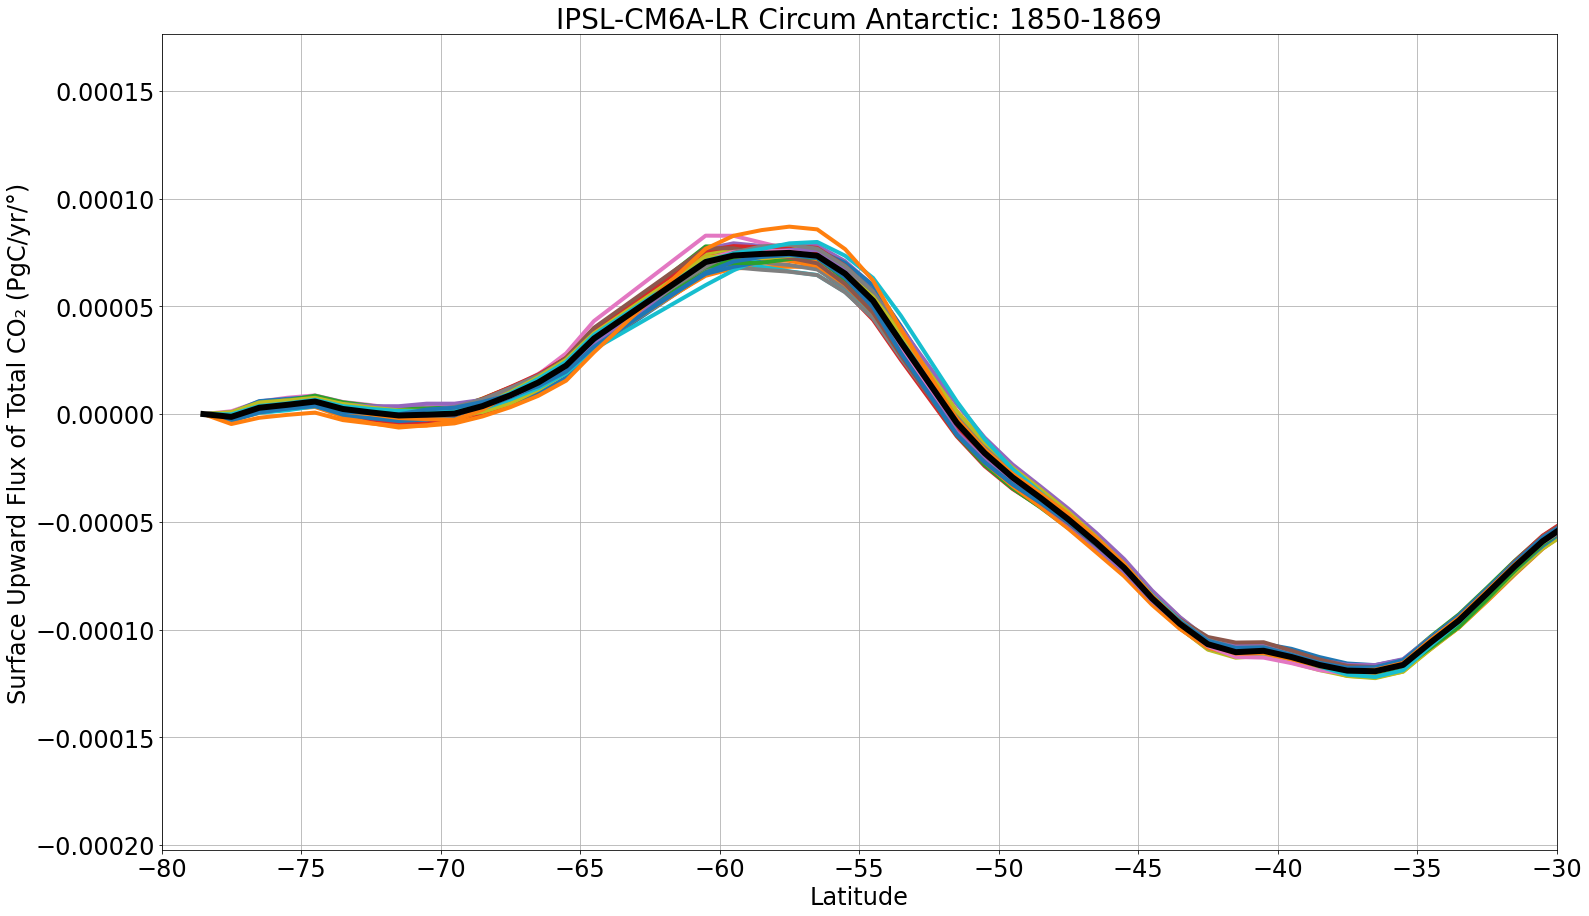

In [42]:
plt.rc('font', size = 24)
plt.rc('axes', titlesize= 24)    
plt.rc('axes', labelsize= 24)
plt.rc('figure', titlesize=24)

temp = {}

conversion = 3.1536e7 * 83.3
for name, ds in dd_regrid.items():
    # multiply by conversion and A
    # multiply by -1 so it is surf UPWARD flux
    d = -1*ds*A*conversion*12/1e15
    d = d.mean(['x'],keep_attrs=True)
    ar = d
    # d = -1*ds.fgco2.mean(['x'],keep_attrs=True)*conversion
    # # d = d.mean(['x'],keep_attrs=True)*conversion
    # ar = d*A2
    
    # put into a temp array so I can eventually take a mean of temp members
    temp[name]=ar
    
# plots the individual models .sel(y = slice(-80, -30))
for name, ds in temp.items():
    plt.plot(ds.y, ds, label = name, lw = 4)
    plt.xlabel('Latitude')
    plt.ylabel('Surface Upward Flux of Total CO\u2082 (molC/m\u00b2/yr)')

# take the mean of temp and plot
mn = np.mean(list(temp.values()), axis=0)
plt.plot(ds.y, mn, lw = 6, label = 'Ensemble mean', color = 'black')
plt.xlabel('Latitude')
# plt.ylabel('Surface Upward Flux of Total CO\u2082 (molC/m\u00b2/yr)')

# zr = xr.zeros_like(dd['CESM2-FV2.gr.historical.Omon'].fgco2)
# plt.plot(zr.y, zr, linestyle = 'dashed', color = 'black')
plt.xlabel('Latitude', fontsize = 24)
plt.ylabel('Surface Upward Flux of Total CO\u2082 (PgC/yr/\u00b0)', fontsize = 24)
# plt.ylim([-0.00011,0.000075])
plt.xlim([-80,-30])
plt.xticks([-80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30])
plt.grid()
# plt.ylim([-5e19, 5e19])
# plt.legend(
# #     bbox_to_anchor=(1.05, 1), 
#     loc='upper right', fontsize = 18
# #     , borderaxespad=0.
# )
plt.title('IPSL-CM6A-LR Circum Antarctic: 1850-1869', fontsize = 28)
plt.rcParams["figure.figsize"] = (25,15)